In [1]:
from qutritexactutils import Qutrit_utils as qu
qu = qu()
import numpy as np
pi = np.pi
import copy


In [2]:
import os
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from qutip import *


In [3]:
def makep_plot(flux, fluxfreq, wlist, spec, lines):
        fig, ax = plt.subplots(1, figsize = (7,7))
        im = ax.pcolor(flux,wlist,spec, shading = 'auto')
        fig.colorbar(im, ax=ax)
        # ax.set_ylim(params['w_params'][0], params['w_params'][1])
        if lines == True:
                ax.plot(flux, params['sys_params'][0]*len(flux), 'w--')
                ax.plot(flux, fluxfreq, 'w--')
        return fig, ax

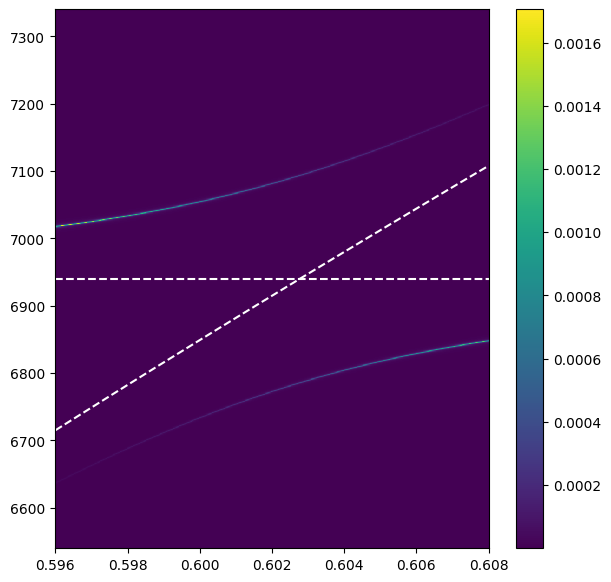

In [16]:

params = {
        'sys_params' : [[6940], .9, 2.4], #parameters for system, loss: [cavity frequency, kappa, gamma]
        'w_params' : [6540, 7340, 1000], #parameters for w_list: [low, high, #steps]
        'fl_params' : [0.596, .608, 500], #params for flux: [low, high, #steps]
        'ec' : 355,     #transmon charging energy
        'ej' : 53450,   #transmon junction energy, transmon regime requires ej>>ec
        'num_transmons': 1, #number of transmons connected to cavity
        'pump' : False, #are we pumping the 2nd transition?
        'g' : [[154, 210]], #transmon-cavity coupling strength
        'P1' : .001, #incoherent drive
        'P2' : .00001 , #coherent drive
        'transition' : 0, #are we probing the negative transition (0) or the positive trasition(1)
        'wpeaks' : 0,
        'delta' : [0,0], #detuning of the transmons from the cavity frequency
        'readout' : 0,
        }
qu.set_params(**params)
flux, wlist, spec, fluxfreq, H = qu.runsim_1()
makep_plot(flux, fluxfreq, wlist, spec, True)
wpeaks = qu.find_peaks(wlist, spec, flux, False)
# print(wpeaks)


# params['pump'] = True
# params['wpeaks'] = wpeaks
# params['w_params'] = [0, 550, 201]

# qu.set_params(**params)
# flux1, wlist1, spec1, fluxfreq1, H = qu.runsim_1()
# # makep_plot(flux1, fluxfreq1, wlist1[0:101]+wpeaks[0:101,0], spec1[0:101]+spec[0:101], False)
# # makep_plot(flux1, fluxfreq1, wlist1+wpeaks[:,0], spec1+spec, False)


# params['pump'] = True
# params['wpeaks'] = wpeaks
# params['w_params'] = [-550, 0, 201]
# params['transition'] = 1
# qu.set_params(**params)
# flux2, wlist2, spec2, fluxfreq2, H = qu.runsim_1()
# # makep_plot(flux2, fluxfreq2, wlist2 + wlist, spec2+spec, False)



In [17]:
params['pump'] = True
params['P2'] = 1
params['wpeaks'] = wpeaks
params['w_params'] = [0, 500, 1000]
params['g'] = [[154, 210]]
params['transition'] = 0
qu.set_params(**params)
flux, wlist1, spec1, fluxfreq, H = qu.runsim_1()
spec1_new = np.transpose(spec1)


params['w_params'] = [-600, 0, 1000]
params['g'] = [[154, 210]]
params['transition'] = 1
qu.set_params(**params)
flux, wlist2, spec2, fluxfreq, H = qu.runsim_1()
spec2_new = np.transpose(spec2)



In [18]:
t= []
for s in spec1_new:
    t.append(find_peaks(s, distance= 40)[0])

In [1]:
### this converts normal 2nd transition pump plots into ones that look like fig 4 plots
num = -4
fig, ax = plt.subplots(1, 2, figsize = [8,4])
ax[1].pcolor(flux, wlist1, spec1, vmax = 0.001)
ax[0].pcolor(flux, wlist, spec, vmax = 0.0000001)

ax[0].plot(flux, wpeaks[:,0], 'w-')
ax[0].plot(flux, wpeaks[:,1], 'w-')


for i in range(len(t)):
    ax[0].plot(flux[i], wlist1[t[i][num]]+wpeaks[i,0], 'y.')
    ax[1].plot(flux[i], wlist1[t[i][num]], 'k.')


NameError: name 'plt' is not defined

In [71]:
t= []
for s in spec2_new:
    t.append(find_peaks(s, height = 0.00005)[0])

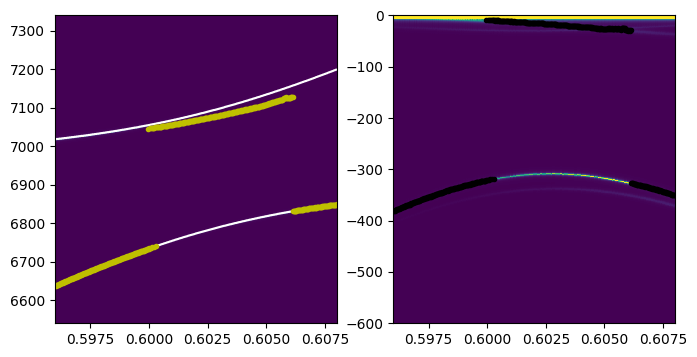

In [73]:
### this converts normal 2nd transition pump plots into ones that look like fig 4 plots
num = -1
fig, ax = plt.subplots(1, 2, figsize = [8,4])
ax[1].pcolor(flux, wlist2, spec2, vmax = 0.0005)
ax[0].pcolor(flux, wlist, spec, vmax = 0.001)

ax[0].plot(flux, wpeaks[:,0], 'w-')
ax[0].plot(flux, wpeaks[:,1], 'w-')
# ax[1].plot(flux, wlist-wpeaks[i,1], 'y.')


for i in range(len(t)):
    ax[0].plot(flux[i], wlist2[t[i][num]]+wpeaks[i,1], 'y.')
    ax[1].plot(flux[i], wlist2[t[i][num]], 'k.')


In [7]:
# params['pump'] = True
# params['wpeaks'] = wpeaks
# params['w_params'] = [-550, 0, 201]
# params['transition'] = 1
# qu.set_params(**params)
# flux2, wlist2, spec2, fluxfreq2, H = qu.runsim_1()
def makep_plot(flux, fluxfreq, wlist, spec, lines):
        fig, ax = plt.subplots(1, figsize = (7,7))
        # ax.pcolor(flux,wlist,spec, shading = 'auto', vmax = 0.0001)
        im = ax.pcolor(flux,wlist,spec, shading = 'auto', vmax = 0.0001)
        fig.colorbar(im, ax=ax)
        # ax.set_ylim(params['w_params'][0], params['w_params'][1])
        if lines == True:
                ax.plot(flux, params['sys_params'][0]*len(flux), 'w--')
                ax.plot(flux, fluxfreq, 'w--')
        return fig, ax
for i in range(len(spec2)):
        for j in range(len(spec2[i])):
                spec2[i][j] += spec[i][j]
# fig, ax = plt.subplots(1, figsize = [7,7])
makep_plot(flux2,fluxfreq2, wlist2 + wpeaks[:,1], spec2, lines = False)


NameError: name 'spec2' is not defined

In [165]:
len(spec1)

1000

In [17]:
wpeakslow = []
wpeakshigh = []


for i in range(len(flux)):


    a1 = find_peaks(spec1[:,i], height = 7e-4)
    
    # print(a1[0])
    peak1 = wlist1[a1[0][-1]]
    
    wpeakslow.append(peak1)
# plt.plot(flux, wpeakslow)

for i in range(len(flux)):


    a1 = find_peaks(spec2[:, i], height = 1*10**-7)
    

    peak2 = wlist2[a1[0][-2]]
    
    wpeakshigh.append(peak2)
# plt.plot(flux, wpeakshigh)
qu.makep_plot(flux2, fluxfreq2, wlist2, spec2, True)
plt.plot(flux2, wpeakshigh)

qu.makep_plot(flux1, fluxfreq1, wlist1, spec1, True)
plt.plot(flux1, wpeakslow)

NameError: name 'spec1' is not defined

In [31]:
np.max(spec2[:,20])

0.03373325778595433

In [9]:
import matplotlib.pyplot as plt

In [ ]:
# lows = []
# highs = []
# fluxs = []
# for d in deltapairs:
#     low, high, flux = np.loadtxt(str(d) + 'delta/2transmon_resonantpeaks', skiprows=1, usecols = [2, 5, 6], unpack=True)
#     lows.append(np.min(low))
#     highs.append(np.min(high))
    # if d[1] == 10:
# plt.plot()
    # plt.plot(g[0], min(low)/min(high), 'go')
    # plt.legend()
    # flux.append()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i in range(len(gpairs1)):
    plt.plot(lows[i], )

In [ ]:
qu.we(.592)

In [ ]:
l = []
for i in params.keys():
    l.append(i)

In [57]:
delta = wpeaks[:,1] - wpeaks[:,0]
delta2 = []
for i in range(len(wpeakshigh)):
    delta2.append(wpeakslow[i] - wpeakshigh[i])


In [59]:
import numpy as np

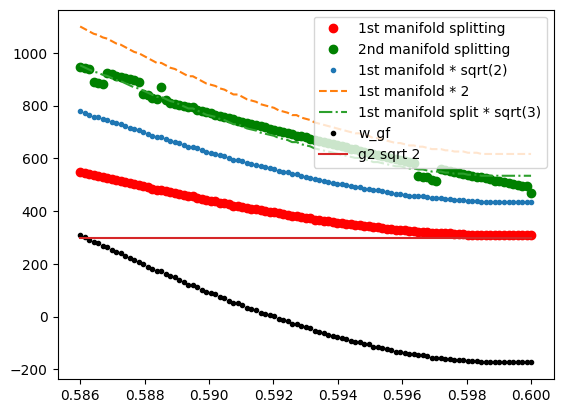

In [84]:

plt.plot(flux, delta, 'ro', label = '1st manifold splitting')
plt.plot(flux, delta2, 'go', label = '2nd manifold splitting')
plt.plot(flux, delta * np.sqrt(2), '.', label = '1st manifold * sqrt(2)')
plt.plot(flux, delta * 2, ls = '--', label = '1st manifold * 2')
plt.plot(flux, delta * np.sqrt(3), '-.', label = '1st manifold split * sqrt(3)')
plt.plot(flux, 2*(delta - 395), 'k.', label = 'w_gf')
plt.plot(flux, [210*np.sqrt(2)]*len(flux), label ='g2 sqrt 2')

plt.legend()

In [ ]:
plt.set_cmap('TABLEAU_COLORS')


ValueError: 'TABLEAU_COLORS' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [ ]:
fl = np.linspace(*[0.586, 0.599, 101])

for i in range(len(wpeakshigh)):
    wpeakshigh[i] += 2*6940
    wpeakslow[i] += 2 * 6940

Text(0.5923, 14050, '$4 g_{g,e}/2\\pi$')

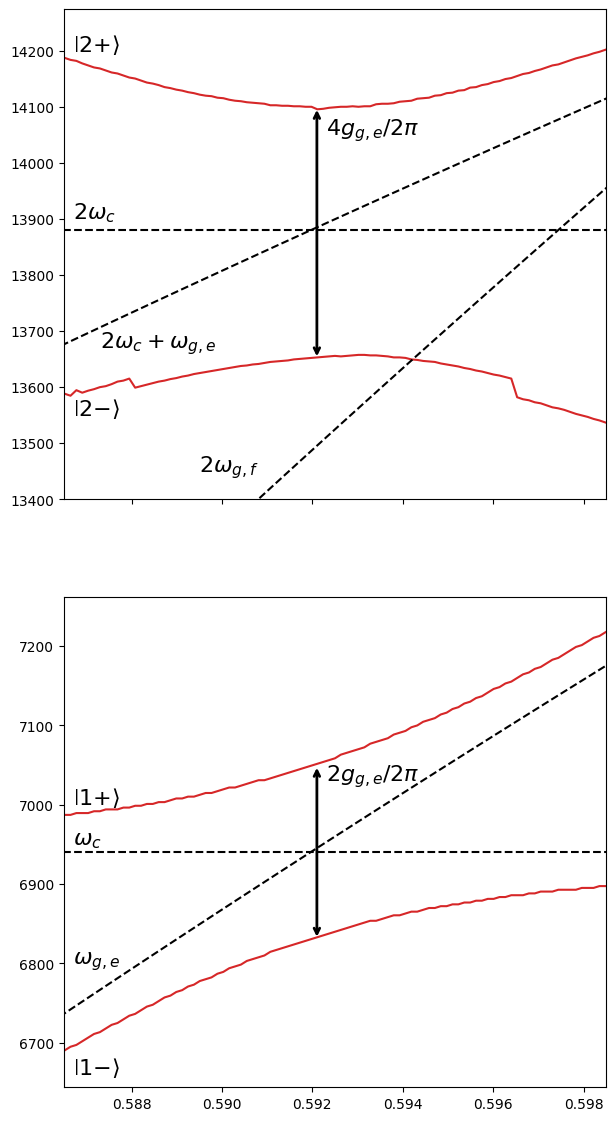

In [ ]:
vgf = np.sqrt(8 * 395 * 53500*np.abs(np.cos(np.pi * flux)))*2 - 395
vge = np.sqrt(8 * 395 * 53500*np.abs(np.cos(np.pi * flux)))

fig, [axsecond, axfirst] = plt.subplots(nrows = 2, figsize = (7, 14), sharex = True)
axfirst.plot(flux, wpeaks[:,0],ls = '-', color = 'tab:red', label = '|-1>')
axfirst.plot(flux, wpeaks[:,1], ls = '-', color = 'tab:red', label = '|+1>')
axfirst.plot(flux, [6940]*len(flux), ls = '--', color = 'k')
axfirst.plot(flux, vge, ls = '--', color = 'k')
axfirst.text(0.5867, 7000, r"$\left| 1 \plus  \right \rangle$", size=16,)
axfirst.text(0.5867, 6660, r"$\left| 1 \minus  \right \rangle$", size=16,)
axfirst.text(0.5867,6950, r'$\omega_c$', fontsize = 16)
axfirst.text(0.5867,6800, r'$\omega_{g,e}$', fontsize = 16, )
axfirst.text(0.5923, 7030, r'$2g_{g,e}/2\pi$', fontsize=16)
axfirst.annotate('', (0.5921, 6830), (0.5921, 7050), arrowprops=dict(arrowstyle='<->', connectionstyle = 'arc3', color = 'k', lw = 2) )




axsecond.plot(flux, wpeakshigh, ls = '-', color = 'tab:red', label = '|-1>')
axsecond.plot(flux, wpeakslow, ls = '-', color = 'tab:red', label = '|+1>')
axsecond.plot(flux, [2 * 6940]*len(flux), ls = '--', color = 'k')
axsecond.plot(flux, vgf, ls = '--', color = 'k', label = 'vgf')
axsecond.plot(flux, vge + 6940,ls = '--', color = 'k', label = 'vge + wc')
axsecond.set_ylim(bottom = 13400)
axsecond.set_xlim(0.5865, 0.5985)


axsecond.text(0.5867,14200, r'$\left| 2 \plus  \right \rangle$', fontsize = 16, )
axsecond.text(0.5867,13550, r'$\left| 2 \minus \right \rangle$', fontsize = 16, )
axsecond.text(0.5867,13900, r'$2 \omega_c$', fontsize = 16, )
axsecond.text(0.5873,13670, r'$2 \omega_c + \omega_{g,e}$', fontsize = 16, )
axsecond.text(0.5895,13450, r'$2 \omega_{g,f}$', fontsize = 16, )
axsecond.annotate('', (0.5921, 13650), (0.5921, 14100), arrowprops=dict(arrowstyle='<->', connectionstyle = 'arc3', color = 'k', lw = 2) )
axsecond.text(0.5923, 14050, r'$4 g_{g,e}/2\pi$', fontsize=16)


AttributeError: 'Qutrit_utils' object has no attribute 'ec'

In [4]:
params = {
        'sys_params' : [[6940], 0.9, 4.3], #parameters for system, loss: [cavity frequency, kappa, gamma]
        'w_params' : [6350, 7500, 501], #parameters for w_list: [low, high, #steps]
        'fl_params' : [0.584, 0.595, 101], #params for flux: [low, high, #steps]
        'ec' : 395, #transmon charging energy
        'ej' : 53500, #transmon junction energy, transmon regime requires ej>>ec
        'num_transmons': 1, #number of transmons connected to cavity
        'pump' : False, #are we pumping the 2nd transition?
        'g' : [[154 + 0j,220 + 0j]], #transmon-cavity coupling strength
        'P1' : .000002, #power of probe tone
        'P2' : .000001, #power of pump tone
        'transition' : 0, #are we probing the negative transition (0) or the positive trasition(1)
        'wpeaks' : 0,
        'delta' : [0,0], #detuning of the transmons from the cavity frequency
        'readout' : 0,
        }

In [3]:
destroy(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         1.         0.        ]
 [0.         0.         1.41421356]
 [0.         0.         0.        ]]